<a href="https://colab.research.google.com/github/Shashi2022/object-detection/blob/master/object-recognition-with-cnn-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# loading the dataset
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()


In [26]:
#To know the shape of train dataset
X_train.shape

(50000, 32, 32, 3)

In [27]:
#To know the shape of train dataset
X_test.shape

(10000, 32, 32, 3)

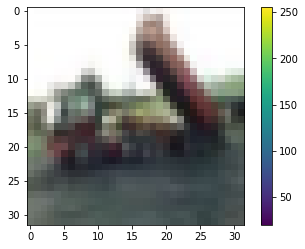

In [28]:
#plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
#plt.grid(False)
plt.show()

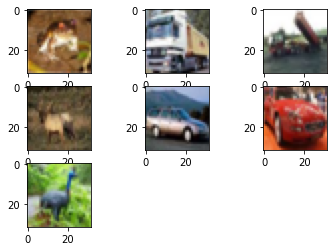

In [29]:
for i in range(7):
    # define subplot
    plt.subplot(330 + 1 + i)
   # plt.subplots(1, 5, figsize=(20,20))
    # plot raw pixel data
    plt.imshow(X_train[i])
plt.show()

In [30]:
#Normalization
X_train, X_test = X_train/255.0, X_test/255.0

In [31]:
#Building CNN model
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [33]:
initial_weights = model.get_weights()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True,validation_data=(X_test,y_test))
model.set_weights(initial_weights)

Epoch 1/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.5246 - accuracy: 0.4411 - val_loss: 1.2663 - val_accuracy: 0.5405
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.1831 - accuracy: 0.5765 - val_loss: 1.1035 - val_accuracy: 0.6041
Epoch 3/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.0431 - accuracy: 0.6303 - val_loss: 1.0433 - val_accuracy: 0.6315
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9510 - accuracy: 0.6636 - val_loss: 0.9883 - val_accuracy: 0.6474
Epoch 5/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8730 - accuracy: 0.6918 - val_loss: 0.9074 - val_accuracy: 0.6801
Epoch 6/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.8137 - accuracy: 0.7144 - val_loss: 0.9016 - val_accuracy: 0.6878
Epoch 7/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.7676 - accuracy: 0.7305 - val_loss: 0.8865

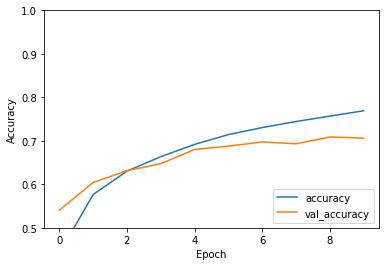

In [34]:
#Plot a graph : Accuracy Vs Val_Accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [35]:
def load_image_show(image_path):
  from keras.preprocessing.image import load_img
  image = load_img(image_path, target_size=(32, 32))
  #plt.figure()
  plt.imshow(image)
  plt.colorbar()
  #plt.grid(False)
  plt.show()
  return image

In [36]:
#Changing image type to np array
def convert_np_array(image):
  type(image)
  test_img=np.asarray(image)
  test_singleimg=np.array([test_img])
  return test_singleimg

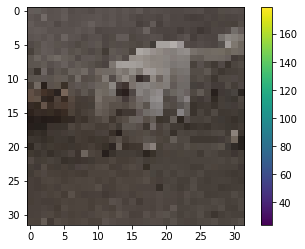

In [37]:
dog1 = load_image_show('/content/sample_data/Dog1.jpg')

In [38]:
dog1_np = convert_np_array(dog1)

In [39]:
#Predicting with model
model.predict(dog1_np)

array([[3.5884339e-04, 5.4704373e-08, 1.7143599e-05, 6.1289307e-10,
        7.4897027e-01, 3.9803816e-10, 7.7574396e-06, 2.4874701e-01,
        5.8081032e-06, 1.8931290e-03]], dtype=float32)

In [40]:
#Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.15,
            height_shift_range=0.15,
            zoom_range=0.5,
            horizontal_flip=True
            )


In [41]:
datagen.fit(X_train)

In [42]:
history = model.fit_generator(datagen.flow(X_train, y_train,
                                    batch_size=32),
                                    epochs=10,
                                    validation_data=(X_test, y_test),
                                    workers=4)

Epoch 1/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.9082 - accuracy: 0.2920 - val_loss: 1.5889 - val_accuracy: 0.4225
Epoch 2/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.6858 - accuracy: 0.3857 - val_loss: 1.4417 - val_accuracy: 0.4701
Epoch 3/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5956 - accuracy: 0.4206 - val_loss: 1.3845 - val_accuracy: 0.4988
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5310 - accuracy: 0.4462 - val_loss: 1.3053 - val_accuracy: 0.5287
Epoch 5/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4856 - accuracy: 0.4645 - val_loss: 1.3044 - val_accuracy: 0.5282
Epoch 6/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4417 - accuracy: 0.4822 - val_loss: 1.2690 - val_accuracy: 0.5505
Epoch 7/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4101 - accuracy: 0.4935 - val_loss: 1

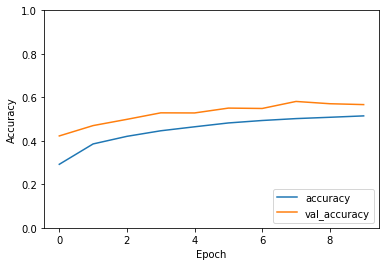

In [43]:
#Plot a graph : Accuracy Vs Val_Accuracy after data augmentation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

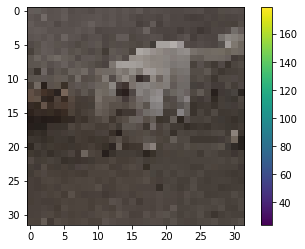

In [46]:
dog1 = load_image_show('/content/sample_data/Dog1.jpg')

In [47]:
dog1_np = convert_np_array(dog1)

In [48]:
#Predicting with model
model.predict(dog1_np)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

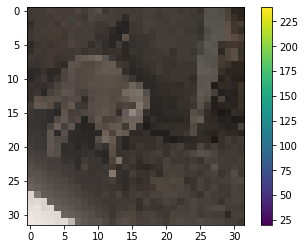

In [49]:
dog2 = load_image_show('/content/sample_data/Dog2.jpg')

In [50]:
dog2_np = convert_np_array(dog2)

In [51]:
#Predicting with model
model.predict(dog2_np)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)